# Step1: Load the data

In [2]:
#Transform the csv file into a dataset
import pandas as pd
res_data = pd.read_csv("game_reviews.csv", delimiter=',')
res_data.head()
#The target variable is whether the text is classified as positive or negative

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [3]:
#check the dataset
res_data.shape

(20000, 2)

In [4]:
print(res_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  20000 non-null  object
 1   Positive    20000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 312.6+ KB
None


In [5]:
# check the number of positive reviews
res_data[res_data["Positive"]==1].shape

(15233, 2)

In [6]:
# check the number of negative reviews
res_data[res_data["Positive"]==0].shape

#There is DATA IMBALANCE problem, which will be solved later

(4767, 2)

# Step2: Data Preprocessing

In [7]:
# Importing essential libraries for performing NLP
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [8]:
# Cleaning the reviews
corpus = []
for i in range(0,20000):
    # Cleaning special character from the reviews, for example, punctuation marks
    # [^a-zA-Z] means match all strings that contain a non-letter
    review = re.sub(pattern='[^a-zA-Z]',repl=" ", string=res_data['reviewText'][i])

    # Converting the entire review into lower case
    review = review.lower()
 
    # Tokenization
    review_words = nltk.word_tokenize(review)

    # Stop words deletion
    review_words = [word for word in review_words if not word in set(stopwords.words('english'))]

    # Stemming 
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)

In [9]:
#Check the first ten reviews
print(corpus[0:9])

['one best app acord bunch peopl agre bomb egg pig tnt king pig realust stuff', 'pretti good version game free lot differ level play kid enjoy lot', 'realli cool game bunch level find golden egg super fun', 'silli game frustrat lot fun definit recommend fun time', 'terrif game pad hr fun grandkid love great entertain wait long line', 'entertain game smart play guess like easi fun game suppos warn game highli addict', 'awesom need wi ti play trust realli fun addict like level even free wast money expens one mean serious get app', 'awesom bet one even read review know game good need', 'basicli free version ad actual awesom addict free time realli reccomend']


# Stept3: Vector Representation of Text

In [10]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import TfidfVectorizer
# we could adjust the value of max_features
# by default, ngram_range=(1,1)
cv = TfidfVectorizer(max_features=2000)
X = cv.fit_transform(corpus).toarray()
y = res_data["Positive"].values

In [11]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
X.shape

(20000, 2000)

In [13]:
y.shape

(20000,)

# Step4: Model Building and Evaluation

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 55)

In [15]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [16]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [17]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 85.75%
Precision score is: 0.85
Recall score is: 0.98


In [18]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[ 406,  520],
       [  50, 3024]], dtype=int64)

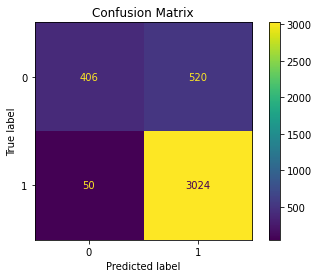

In [20]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

# Step5: SMOTE

In [21]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [22]:
#Oversampling
oversample = SMOTE()
X_smote,y_smote = oversample.fit_resample(X,y)
counter_smote = Counter(y_smote)
print(counter_smote)

Counter({1: 15233, 0: 15233})


# Step6: Model Building and Evaluation After SMOTE

In [23]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_smote, y_smote, test_size = 0.20, random_state = 45)

In [24]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train1, y_train1)

MultinomialNB()

In [25]:
# Predicting the Test set results
y_pred1 = classifier.predict(X_test1)

In [26]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score4 = accuracy_score(y_test1,y_pred1)
score5 = precision_score(y_test1,y_pred1)
score6= recall_score(y_test1,y_pred1)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score4*100,2)))
print("Precision score is: {}".format(round(score5,2)))
print("Recall score is: {}".format(round(score6,2)))

---- Scores ----
Accuracy score is: 86.2%
Precision score is: 0.86
Recall score is: 0.86


In [27]:
# Create the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test1, y_pred1)

In [28]:
cm

array([[2653,  417],
       [ 424, 2600]], dtype=int64)

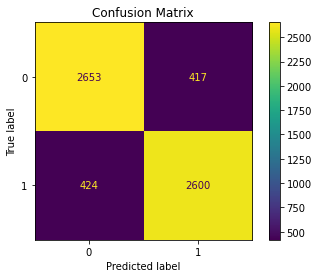

In [29]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [30]:
#Compare the two models
print("---- Comparison of Two Models ----")
print("Original Model Scores:")
print("Accuracy score is: {}%".format(round(score1 * 100, 2)))
print("Precision score is: {}".format(round(score2, 2)))
print("Recall score is: {}".format(round(score3, 2)))

print("\nSMOTE Model Scores:")
print("Accuracy score is: {}%".format(round(score4 * 100, 2)))  
print("Precision score is: {}".format(round(score5, 2))) 
print("Recall score is: {}".format(round(score6, 2))) 


if score1 > score4:  
    print("\nThe original model performs better.")
else:
    print("\nThe SMOTE model performs better.")

---- Comparison of Two Models ----
Original Model Scores:
Accuracy score is: 85.75%
Precision score is: 0.85
Recall score is: 0.98

SMOTE Model Scores:
Accuracy score is: 86.2%
Precision score is: 0.86
Recall score is: 0.86

The SMOTE model performs better.


In [32]:
#Find the best alpha
import numpy as np
from sklearn.naive_bayes import MultinomialNB 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train1, y_train1)
    temp_y_pred = temp_classifier.predict(X_test1)
    score = accuracy_score(y_test1, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 86.18%
Accuracy score for alpha=0.2 is: 86.31%
Accuracy score for alpha=0.3 is: 86.27%
Accuracy score for alpha=0.4 is: 86.28%
Accuracy score for alpha=0.5 is: 86.35%
Accuracy score for alpha=0.6 is: 86.28%
Accuracy score for alpha=0.7 is: 86.27%
Accuracy score for alpha=0.8 is: 86.25%
Accuracy score for alpha=0.9 is: 86.22%
Accuracy score for alpha=1.0 is: 86.2%
--------------------------------------------
The best accuracy is 86.35% with alpha value as 0.5


In [33]:
#Define a sentiment prediction function
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = nltk.word_tokenize(sample_review)
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    # remember to CountVectorize the review
    temp = cv.transform([final_review]).toarray()
    return classifier.predict(temp)

# Step7: Predicting

In [34]:
# Predicting the input value1
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:Absolutely addictive! This game is a  perfect blend of challenging puzzles and  stunning graphics. I find myself  immersed for hours on end, always  eager to beat my high score. 
This is a POSITIVE review.😀


In [35]:
# Predicting the input value2
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:A masterpiece of mobile gaming! This  game sets the bar high with its engaging  gameplay and visually stunning design.
This is a POSITIVE review.😀


In [36]:
# Predicting the input value3
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:The game mechanics are decent, but the  constant ads really disrupt the gameplay  flow. It's frustrating to be interrupted  every few minutes, making it hard to  fully enjoy the game.
This is a NEGATIVE review!😒


In [37]:
# Predicting the input value4
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:The graphics are okay, but the levels  start feeling repetitive after a while. It  lacks the variety needed to keep me  engaged for long play sessions.
This is a POSITIVE review.😀


In [38]:
# Predicting the input value5
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:I enjoy the game's concept, but the inapp purchases are pushed a bit too  aggressively. Progression feels  artificially slowed down unless you're  willing to spend money.
This is a NEGATIVE review!😒


In [39]:
# Predicting the input value6
sample_review=input("please input a review:")
if predict_sentiment(sample_review)==1:
    print('This is a POSITIVE review.\U0001f600') 
else:
    print('This is a NEGATIVE review!\U0001f612')

please input a review:"Addictively fun! I can't get enough of  this game. The graphics are top-notch,  the sound effects are immersive, and the  gameplay is both challenging and  rewarding.
This is a POSITIVE review.😀
